In [21]:

from datetime import datetime
import backtrader as bt
class SmaCross(bt.Strategy): # bt.Strategy를 상속한 class로 생성해야 함.
    
    params = dict(
    pfast=5, # period for the fast moving average
    pslow=30 # period for the slow moving average
    )
    
    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast) # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow) # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2) # crossover signal
        
    def next(self):
        if not self.position: # not in the market
            if self.crossover > 0: # if fast crosses slow to the upside
                close = self.data.close[0] # 종가 값
                size = int(self.broker.getcash() / close) # 최대 구매 가능 개수
                self.buy(size=size) # 매수 size = 구매 개수 설정
        elif self.crossover < 0: # in the market & cross to the downside
            self.close() # 매도
        
cerebro = bt.Cerebro() # create a "Cerebro" engine instance
# 삼성전자의 '005930.KS' 코드를 적용하여 데이터 획득
data = bt.feeds.YahooFinanceData(dataname='005930.KS',
                    fromdate=datetime(2019, 1, 1),
                    todate=datetime(2019, 12, 31))

cerebro.adddata(data)
cerebro.broker.setcash(1000000) # 초기 자본 설정
cerebro.broker.setcommission(commission=0.00015) # 매매 수수료는 0.015% 설정
cerebro.addstrategy(SmaCross) # 자신만의 매매 전략 추가
cerebro.run() # 백테스팅 시작




<IPython.core.display.Javascript object>


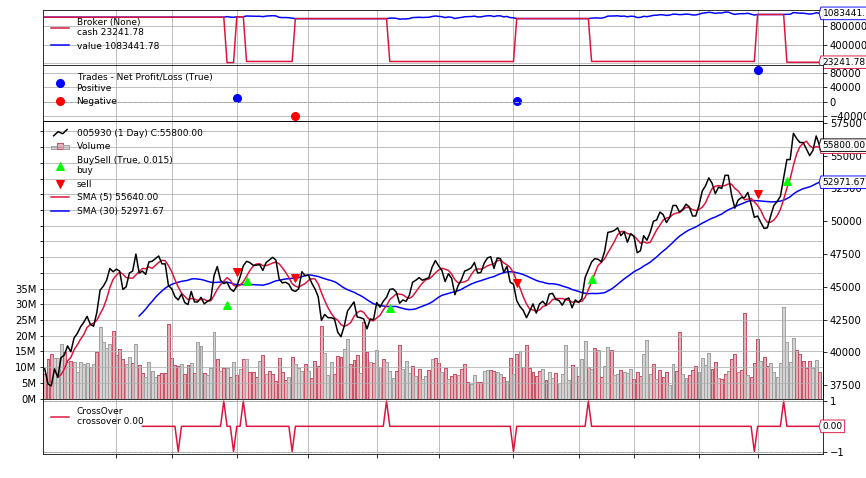

[[<Figure size 432x288 with 5 Axes>]]

In [22]:
%matplotlib inline
cerebro.plot() # 그래프로 보여주기